In [13]:
from main import *
from data_generation import *

# Synthetic Dataset Generation

In [14]:
tasks = {'log_in': ['one',['credentials check','sing up','recover pw and log in'],(0,10)],
            'search_book': ['rand',['history','fantasy','crime','poetry','biography'],(5,15)],
            'shipment' : ['all',['adress','door number','zip code'],(15,50)],
            'payment' : ['one',['visa','master card','revolut','paypal','apple pay'],(10,100)],
            'new_site' : ['con',['site1','site2'],(10,100)],
            'site1' : ['opt',['site1_1','site1_2','site1_3'],(10,100)],
            'site2' : ['opt',['site2_1','site2_2'],(10,100)]
}   
start_time = datetime(2024, 6, 3, 9, 0, 0)  
end_time = datetime(2024, 6, 3, 10, 45, 0) 
 
spark = SparkSession.builder.getOrCreate()
file_name = "SDG_dataset_test.csv"
# generate_dataset(tasks, 1000000,start_time,end_time,file_name="dataset")
#data = spark.read.csv("data/SDG_dataset.csv", header=True, inferSchema=True)  
generate_dataset(tasks, 100000,start_time,end_time,file_name="dataset_test")
data = spark.read.csv("data/SDG_dataset_test.csv", header=True, inferSchema=True)    


# Part 1

### Experiments with different k-shingles

k = 3

In [9]:
exp3 = experiment(data,3)

average trace length: 38.22745995423341
average trace # shingles: 28.08604118993135
Initial number of cases: 4370
Number of unique processes after merging them with 0.9642857142857143 threshold using 7-shingles: 3563
Cases with the lowe
######################### 251 vs 1388 ################################
jaccard similarity: 0.92
251 : S0S3S3_1S3_2S3_3S4S4_1S2S2_2S2_1
1388 : S0S3S3_1S3_2S3_3S4S4_1S2S2_2S2_4
#######################################################################


k = 4

In [ ]:
exp4 = experiment(data,4)

k = 5

In [ ]:
exp5 = experiment(data,5)

k = 6

In [ ]:
exp6 = experiment(data,6)

k = 7

In [ ]:
exp7 = experiment(file_name,7)

k = 8

In [ ]:
exp8 = experiment(file_name,8)

k = 9

In [ ]:
exp9 = experiment(file_name,9)

### Perfomance evaluation

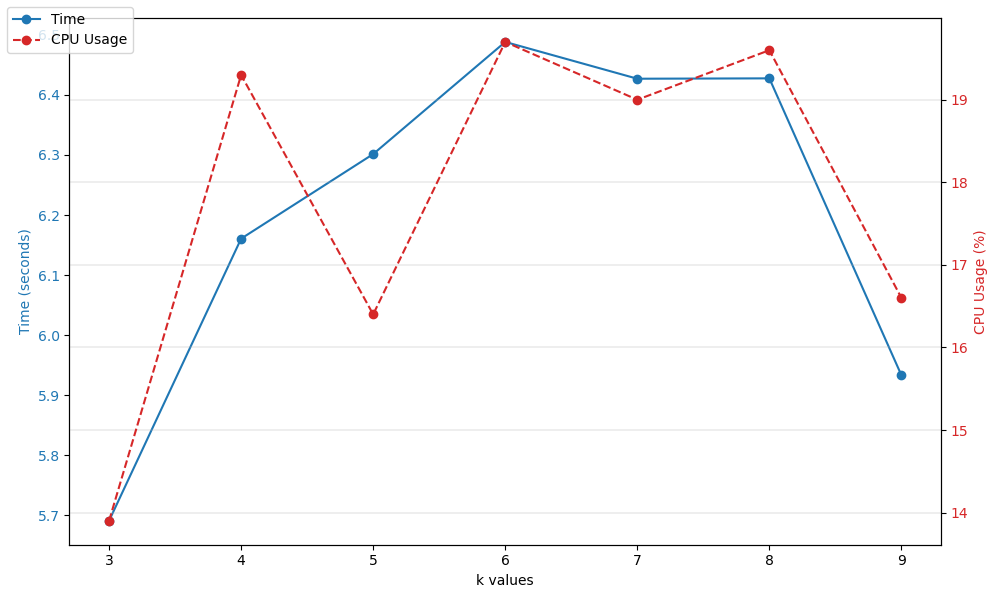

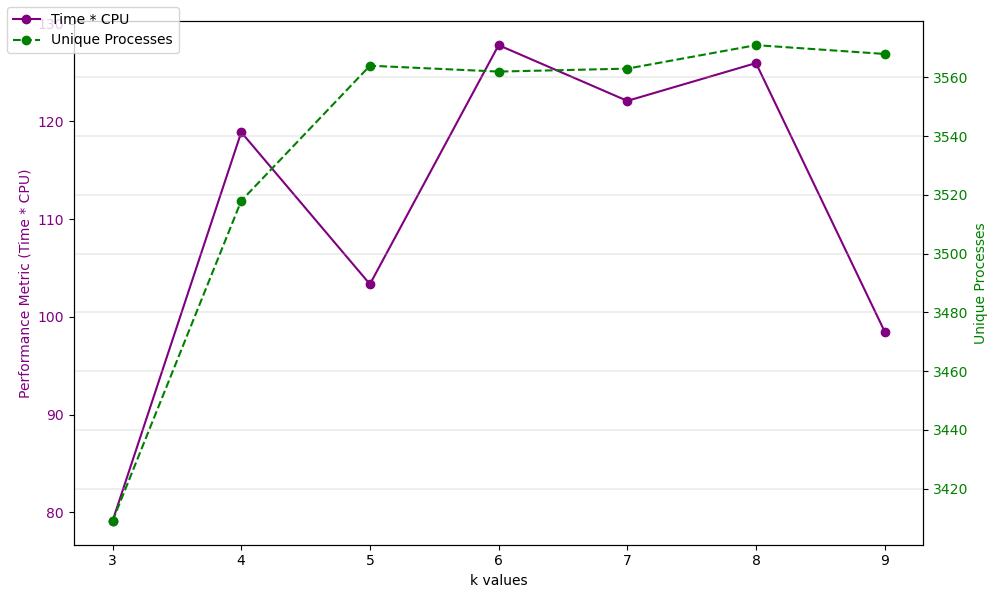

In [10]:
performance_eval(minhash_lsh,bucketing,data,[3,4,5,6,7,8,9])

To obtain the output files

In [15]:
output("data/SDG_dataset_test.csv",7,0.97)

+-------+--------------------+
|user_id|            features|
+-------+--------------------+
|      1|S0S1S1_2S4S4_1S3S...|
|      2|S0S2S2_5S2_2S2_4S...|
|      3|S0S3S3_1S3_2S3_3S...|
|      4|S0S5S5_1S5_1_1S2S...|
|      5|S0S1S1_3S3S3_1S3_...|
|      6|S0S4S4_5S5S5_1S5_...|
|      7|S0S2S2_2S3S3_1S3_...|
|      8|S0S3S3_1S3_2S3_3S...|
|      9|S0S5S5_1S5_1_3S1S1_3|
|     10|S0S1S1_3S3S3_1S3_...|
|     11|S0S3S3_1S3_2S3_3S...|
|     12|S0S1S1_3S4S4_3S5S...|
|     13|S0S1S1_2S5S5_2S5_...|
|     14|S0S4S4_2S3S3_1S3_...|
|     15|      S0S1S1_2S2S2_5|
|     16|S0S4S4_1S3S3_1S3_...|
|     17|S0S4S4_2S2S2_5S2_...|
|     18|S0S1S1_2S4S4_2S3S...|
|     19|S0S2S2_5S2_3S2_4S...|
|     20|S0S4S4_4S3S3_1S3_...|
+-------+--------------------+
only showing top 20 rows

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/tomascarrilho/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/v9/vw_3jh0926dbbfz0qf1kwbzr0000gn/T/ipykernel_72049/3929351212.py", line 1, in <module>
    output("data/SDG_dataset_test.csv",7,0.97)
  File "/Users/tomascarrilho/Desktop/Uni/DIS/Assignment/Data_Intensive_Systems/main.py", line 245, in output
  File "/Users/tomascarrilho/Desktop/Uni/DIS/Assignment/Data_Intensive_Systems/main.py", line 49, in minhash_lsh
    m = MinHash(num_perm=128)
  File "/Users/tomascarrilho/opt/anaconda3/lib/python3.8/site-packages/datasketch/minhash.py", line 107, in __init__
    if len(self) != len(self.permutations[0]):
  File "/Users/tomascarrilho/opt/anaconda3/lib/python3.8/site-packages/datasketch/minhash.py", line 285, in __len__
    def __len__(self) -> int:
KeyboardInterrupt

During handling of the above exception, anoth

# Part 2

### Experiments with different thresholds

threshold 0.9

In [ ]:
df_filtered = data.filter(data.type.isin(['Req']))
df_grouped = df_filtered.groupBy("user_id").agg(concat_ws("",collect_list("to")).alias("features"))

In [7]:
exp0_9 = experiment(data,7,threshold=0.9)

average trace length: 38.158701120512234
average trace # shingles: 32.158701120512234
Initial number of cases: 4373
threshold: 0.9
Number of unique processes after merging them with 0.9 threshold using 7-shingles: 3495
######################### 3297 vs 3942 ################################
jaccard similarity: 0.9310344827586207
3297 : S0S5S5_2S5_2_1S3S3_1S3_2S3_3S1S1_3
3942 : S0S5S5_2S5_2_1S3S3_1S3_2S3_3S1S1_1
#######################################################################
######################### 867 vs 2983 ################################
jaccard similarity: 0.8235294117647058
867 : S0S5S5_2S5_2_1S3S3_1S3_2S3_3S1S1_3
2983 : S0S5S5_2S5_2_1S3S3_1S3_2S3_3S1S1_3S4S4_1
#######################################################################
######################### 2954 vs 2443 ################################
jaccard similarity: 0.8235294117647058
2954 : S0S5S5_2S5_2_1S3S3_1S3_2S3_3S1S1_3
2443 : S0S5S5_2S5_2_1S3S3_1S3_2S3_3S1S1_3S4S4_5
##########################################

threshold 0.85

In [8]:
exp0_85 = experiment(data,7,threshold=0.85)

average trace length: 38.158701120512234
average trace # shingles: 32.158701120512234
Initial number of cases: 4373
threshold: 0.85
Number of unique processes after merging them with 0.85 threshold using 7-shingles: 3297
######################### 2856 vs 3424 ################################
jaccard similarity: 0.7714285714285715
2856 : S0S5S5_2S5_2_1S3S3_1S3_2S3_3S4S4_3S1S1_2
3424 : S0S5S5_2S5_2_1S3S3_1S3_2S3_3S4S4_2
#######################################################################


threshold 0.8

In [9]:
exp0_8 = experiment(data,7,threshold=0.8)

average trace length: 38.158701120512234
average trace # shingles: 32.158701120512234
Initial number of cases: 4373
threshold: 0.8
Number of unique processes after merging them with 0.8 threshold using 7-shingles: 3175
######################### 1583 vs 327 ################################
jaccard similarity: 0.6585365853658537
1583 : S0S1S1_3S5S5_2S5_2_1S4S4_2S3S3_1S3_2S3_3
327 : S0S1S1_3S5S5_2S5_2_1S4S4_4S3S3_1S3_2S3_3
#######################################################################


To obtain the final output

In [ ]:
output("data/SDG_dataset_test.csv",7,0.9,p1=False)